In [ ]:
# Basic iris visualization

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


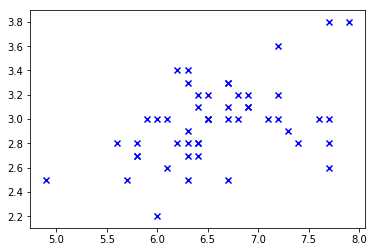

In [8]:

from matplotlib import pyplot as plt
import numpy as np

# load the data with load_iris from sklearn
from sklearn.datasets import load_iris
data = load_iris()

# load_iris returns an object with several fields
features = data.data
feature_names = data.feature_names
print (feature_names)

target = data.target
target_names = data.target_names
print(target_names)

# shape
print(features.shape)


for t in range(3):
    if t == 0:
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t == 2:
        c = 'b'
        marker = 'x'

plt.scatter(features[target == t,0], features[target == t,1], marker=marker, c=c)
plt.show()

In [ ]:
#K-Mean Clustering

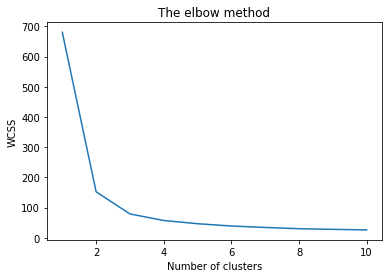

In [20]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values

#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [21]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

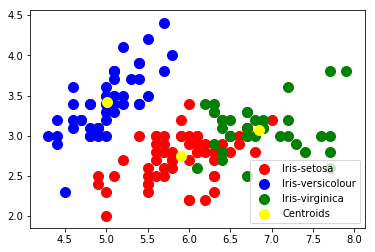

In [28]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()


In [ ]:
#classification of features

In [31]:
#findout unique classification/type of iris flower.
dataset['Species'].unique()

#findout no of rows for each Species.
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [32]:
#Create 3 DataFrame for each Species
setosa=dataset[dataset['Species']=='Iris-setosa']
versicolor =dataset[dataset['Species']=='Iris-versicolor']
virginica =dataset[dataset['Species']=='Iris-virginica']

print(setosa.describe())
print(versicolor.describe())
print(virginica.describe())

             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min     51.00000       4.900000   

In [33]:
print(dataset.describe())
#count tells that all the 4 features have 150 rows
#in general ,From Mean we can say that sepal is larger than petal.

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


<Figure size 432x288 with 0 Axes>

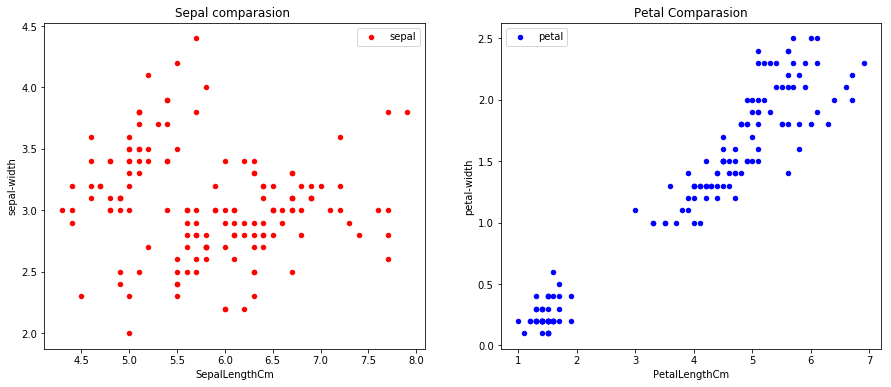

In [39]:
#Plotting Petal Length vs Petal Width & Sepal Length vs Sepal width
#warnings.simplefilter("ignore")#Supress any warning
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(15, 6))
dataset.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
dataset.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
plt.show()
# plt.close()

# we can see that  there are some petals which are smaller than rest of petal.
#Let's examine them

<Figure size 432x288 with 0 Axes>

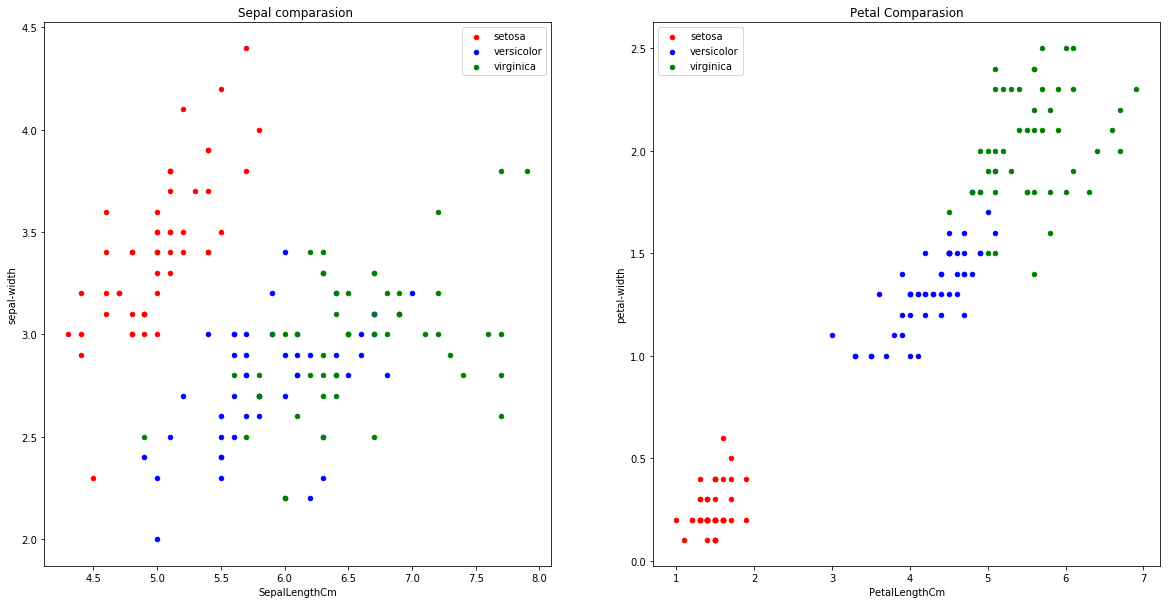

In [42]:
#for each Species ,let's check what is petal and sepal distibutuon
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(20, 10))

setosa.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter",ax=ax[0],label='setosa',color='r')
versicolor.plot(x="SepalLengthCm",y="SepalWidthCm",kind="scatter",ax=ax[0],label='versicolor',color='b')
virginica.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter",ax=ax[1],label='setosa',color='r')
versicolor.plot(x="PetalLengthCm",y="PetalWidthCm",kind="scatter",ax=ax[1],label='versicolor',color='b')
virginica.plot(x="PetalLengthCm", y="PetalWidthCm", kind="scatter", ax=ax[1], label='virginica', color='g')

ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()
plt.show()
# plt.close()

#satosa   - satosa Petal are relatively smaller than rest of species .can be easily separable from rest of Species 
#versicolor & virginica are also separable in Petal comprasion
#satoa sepal are smallest in length and largest in Width than other species


<Figure size 432x288 with 0 Axes>

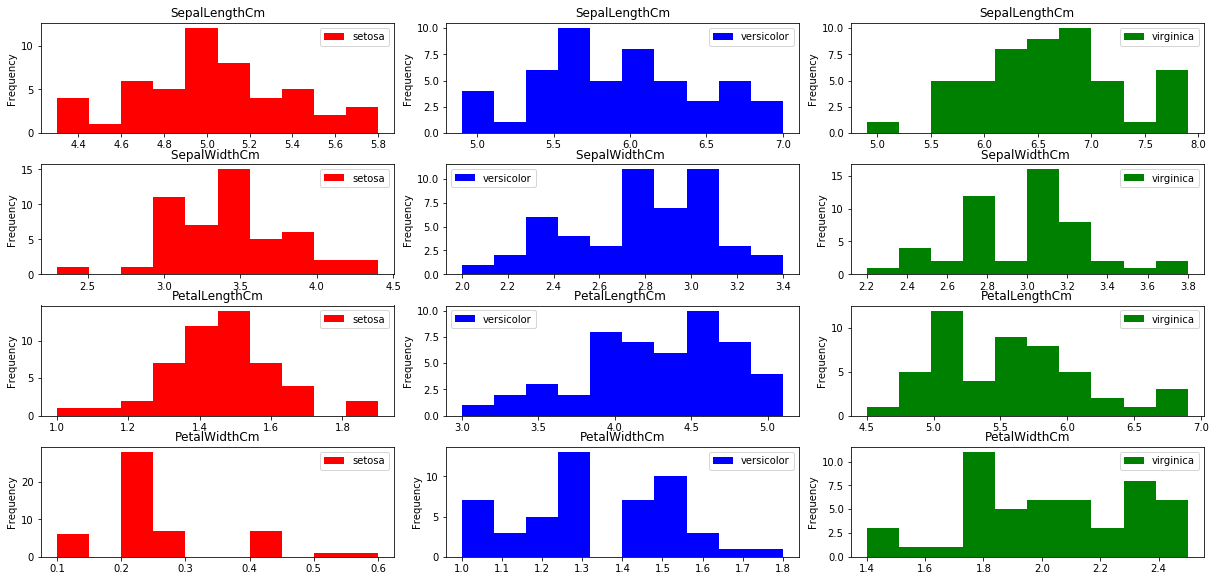

In [43]:
###############################Histogram# Plot all feature for all species###########################################################################
plt.figure()

fig,ax=plt.subplots(4,3,figsize=(17, 8))
setosa["SepalLengthCm"].plot(kind="hist", ax=ax[0][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalLengthCm"].plot(kind="hist", ax=ax[0][1],label="versicolor",color='b',fontsize=10)
virginica["SepalLengthCm"].plot( kind="hist",ax=ax[0][2],label="virginica",color='g',fontsize=10)

setosa["SepalWidthCm"].plot(kind="hist", ax=ax[1][0],label="setosa",color ='r',fontsize=10)
versicolor["SepalWidthCm"].plot(kind="hist", ax=ax[1][1],label="versicolor",color='b',fontsize=10)
virginica["SepalWidthCm"].plot( kind="hist",ax=ax[1][2],label="virginica",color='g',fontsize=10)

setosa["PetalLengthCm"].plot(kind="hist", ax=ax[2][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalLengthCm"].plot(kind="hist", ax=ax[2][1],label="versicolor",color='b',fontsize=10)
virginica["PetalLengthCm"].plot( kind="hist",ax=ax[2][2],label="virginica",color='g',fontsize=10)


setosa["PetalWidthCm"].plot(kind="hist", ax=ax[3][0],label="setosa",color ='r',fontsize=10)
versicolor["PetalWidthCm"].plot(kind="hist", ax=ax[3][1],label="versicolor",color='b',fontsize=10)
virginica["PetalWidthCm"].plot( kind="hist",ax=ax[3][2],label="virginica",color='g',fontsize=10)

plt.rcParams.update({'font.size': 10})
plt.tight_layout()

ax[0][0].set(title='SepalLengthCm')
ax[0][1].set(title='SepalLengthCm')
ax[0][2].set(title='SepalLengthCm')
ax[1][0].set(title='SepalWidthCm ')
ax[1][1].set(title='SepalWidthCm ')
ax[1][2].set(title='SepalWidthCm ')
ax[2][0].set(title='PetalLengthCm')
ax[2][1].set(title='PetalLengthCm ')
ax[2][2].set(title='PetalLengthCm')
ax[3][0].set(title='PetalWidthCm')
ax[3][1].set(title='PetalWidthCm')
ax[3][2].set(title='PetalWidthCm')

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()
ax[2][0].legend()
ax[2][1].legend()
ax[2][2].legend()
ax[3][0].legend()
ax[3][1].legend()
ax[3][2].legend()


plt.show()